## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [23]:
class preprocessing_ops():
    def __init__(self, df):
        self.df = df

    def drop_duplicates(self): 
        self.df.drop_duplicates(inplace=True) 
    
    # since WT01 and WT02 both indicate fogs (only difference is if it's heavy or not), we can combine them into one column
    def add_fog(self):
        self.df['WT_FOG'] = np.where((self.df['WT01'] == 1) | (self.df['WT02'] == 1), 1, 0)
        self.df.drop(columns=['WT01','WT02'],inplace=True)

    def remove_cancelled(self):
        self.df = self.df[self.df.CANCELLED != 1]
        self.df.drop(columns=['CANCELLED','CANCELLATION_CODE'],inplace = True)

    def remove_missing_values(self):
        self.df = self.df.loc[:, self.df.isnull().mean() < .9]
    
    # drop IDs, similar columns, post-flight available columns, na values above 35%
    def drop_columns(self):
        self.df.drop(columns=['OP_CARRIER_FL_NUM','Unnamed: 32', 'ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','AIRLINE_ID','OP_UNIQUE_CARRIER','STATION','MANUFACTURE_YEAR'
                         , 'ORIGIN_CITY_NAME','ORIGIN_CITY_NAME_x','ORIGIN_CITY_NAME_y','NAME_x','NAME_y','DEST_CITY_NAME','DEPARTING_AIRPORT','DISPLAY_AIRPORT_NAME','DEST_CITY_NAME'
                         , 'DATE', 'ACTUAL_ELAPSED_TIME','DEP_TIME','DEP_DELAY_NEW', 'DEP_TIME_BLK','ARR_TIME','ARR_DELAY_NEW','ARR_TIME_BLK'
                         , 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'WESD','PSUN','TSUN','SN32','SX32','TOBS','WT11','PGTM','SNWD','SNOW'
                         ] ,inplace = True)
    
    # WT has 1 unique value (1 if true and nan if not so filling nans with 0s). then deal with high percentage 0 columns
    def fill_weather_codes(self):
        self.df.fillna({'WT03':'0', 'WT04':'0', 'WT05':'0', 'WT06':'0', 'WT07':'0', 'WT08':'0', 'WT09':'0', 'WT10':'0'}, inplace=True)
        self.df.drop(columns=['WT10','WT07','WT05','WT09','WT04','WT06'],inplace=True)

    # ‘any’ : If any NA values are present, drop that row or column.
    def drop_na(self):
        self.df.dropna(subset=['TAVG','NUMBER_OF_SEATS','WDF5','WSF5','PRCP','TMIN','TMAX','AWND','WSF2','WDF2'], how='any',inplace=True)

    def get_df(self):
        return self.df   

In [24]:
# read
df = pd.read_csv('data/5guys_flight_data.csv')

# instantiate
preprocessing = preprocessing_ops(df)

# call methods
preprocessing.drop_duplicates()
preprocessing.drop_columns()
preprocessing.remove_cancelled()
preprocessing.add_fog()
preprocessing.fill_weather_codes()
preprocessing.drop_na()

df = preprocessing.get_df()

/var/folders/nv/9r2j07yj4w7gpdqz5zp13j3m0000gn/T/ipykernel_27762/3202077604.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/5guys_flight_data.csv')
/var/folders/nv/9r2j07yj4w7gpdqz5zp13j3m0000gn/T/ipykernel_27762/399571185.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.drop(columns=['CANCELLED','CANCELLATION_CODE'],inplace = True)
/var/folders/nv/9r2j07yj4w7gpdqz5zp13j3m0000gn/T/ipykernel_27762/399571185.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['W

In [25]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DEL15,CRS_ARR_TIME,CRS_ELAPSED_TIME,...,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT03,WT08,WT_FOG
0,1,28,1,N13718,ORD,PSP,1028,1.0,1306,278.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0,1.0,1
2,1,28,1,N56859,ORD,DEN,1011,1.0,1200,169.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0,1.0,1
3,1,28,1,N37253,ORD,IAH,600,1.0,853,173.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0,1.0,1
4,1,28,1,N57864,ORD,DEN,851,0.0,1040,169.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0,1.0,1
5,1,28,1,N68802,ORD,SJU,754,1.0,1435,281.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593301,12,25,3,N485HA,LIH,HNL,1835,0.0,1911,36.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0,0,0
6593302,12,25,3,N475HA,LIH,HNL,1659,1.0,1736,37.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0,0,0
6593303,12,25,3,N486HA,LIH,HNL,2025,0.0,2100,35.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0,0,0
6593304,12,25,3,N492HA,LIH,HNL,2123,0.0,2158,35.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0,0,0


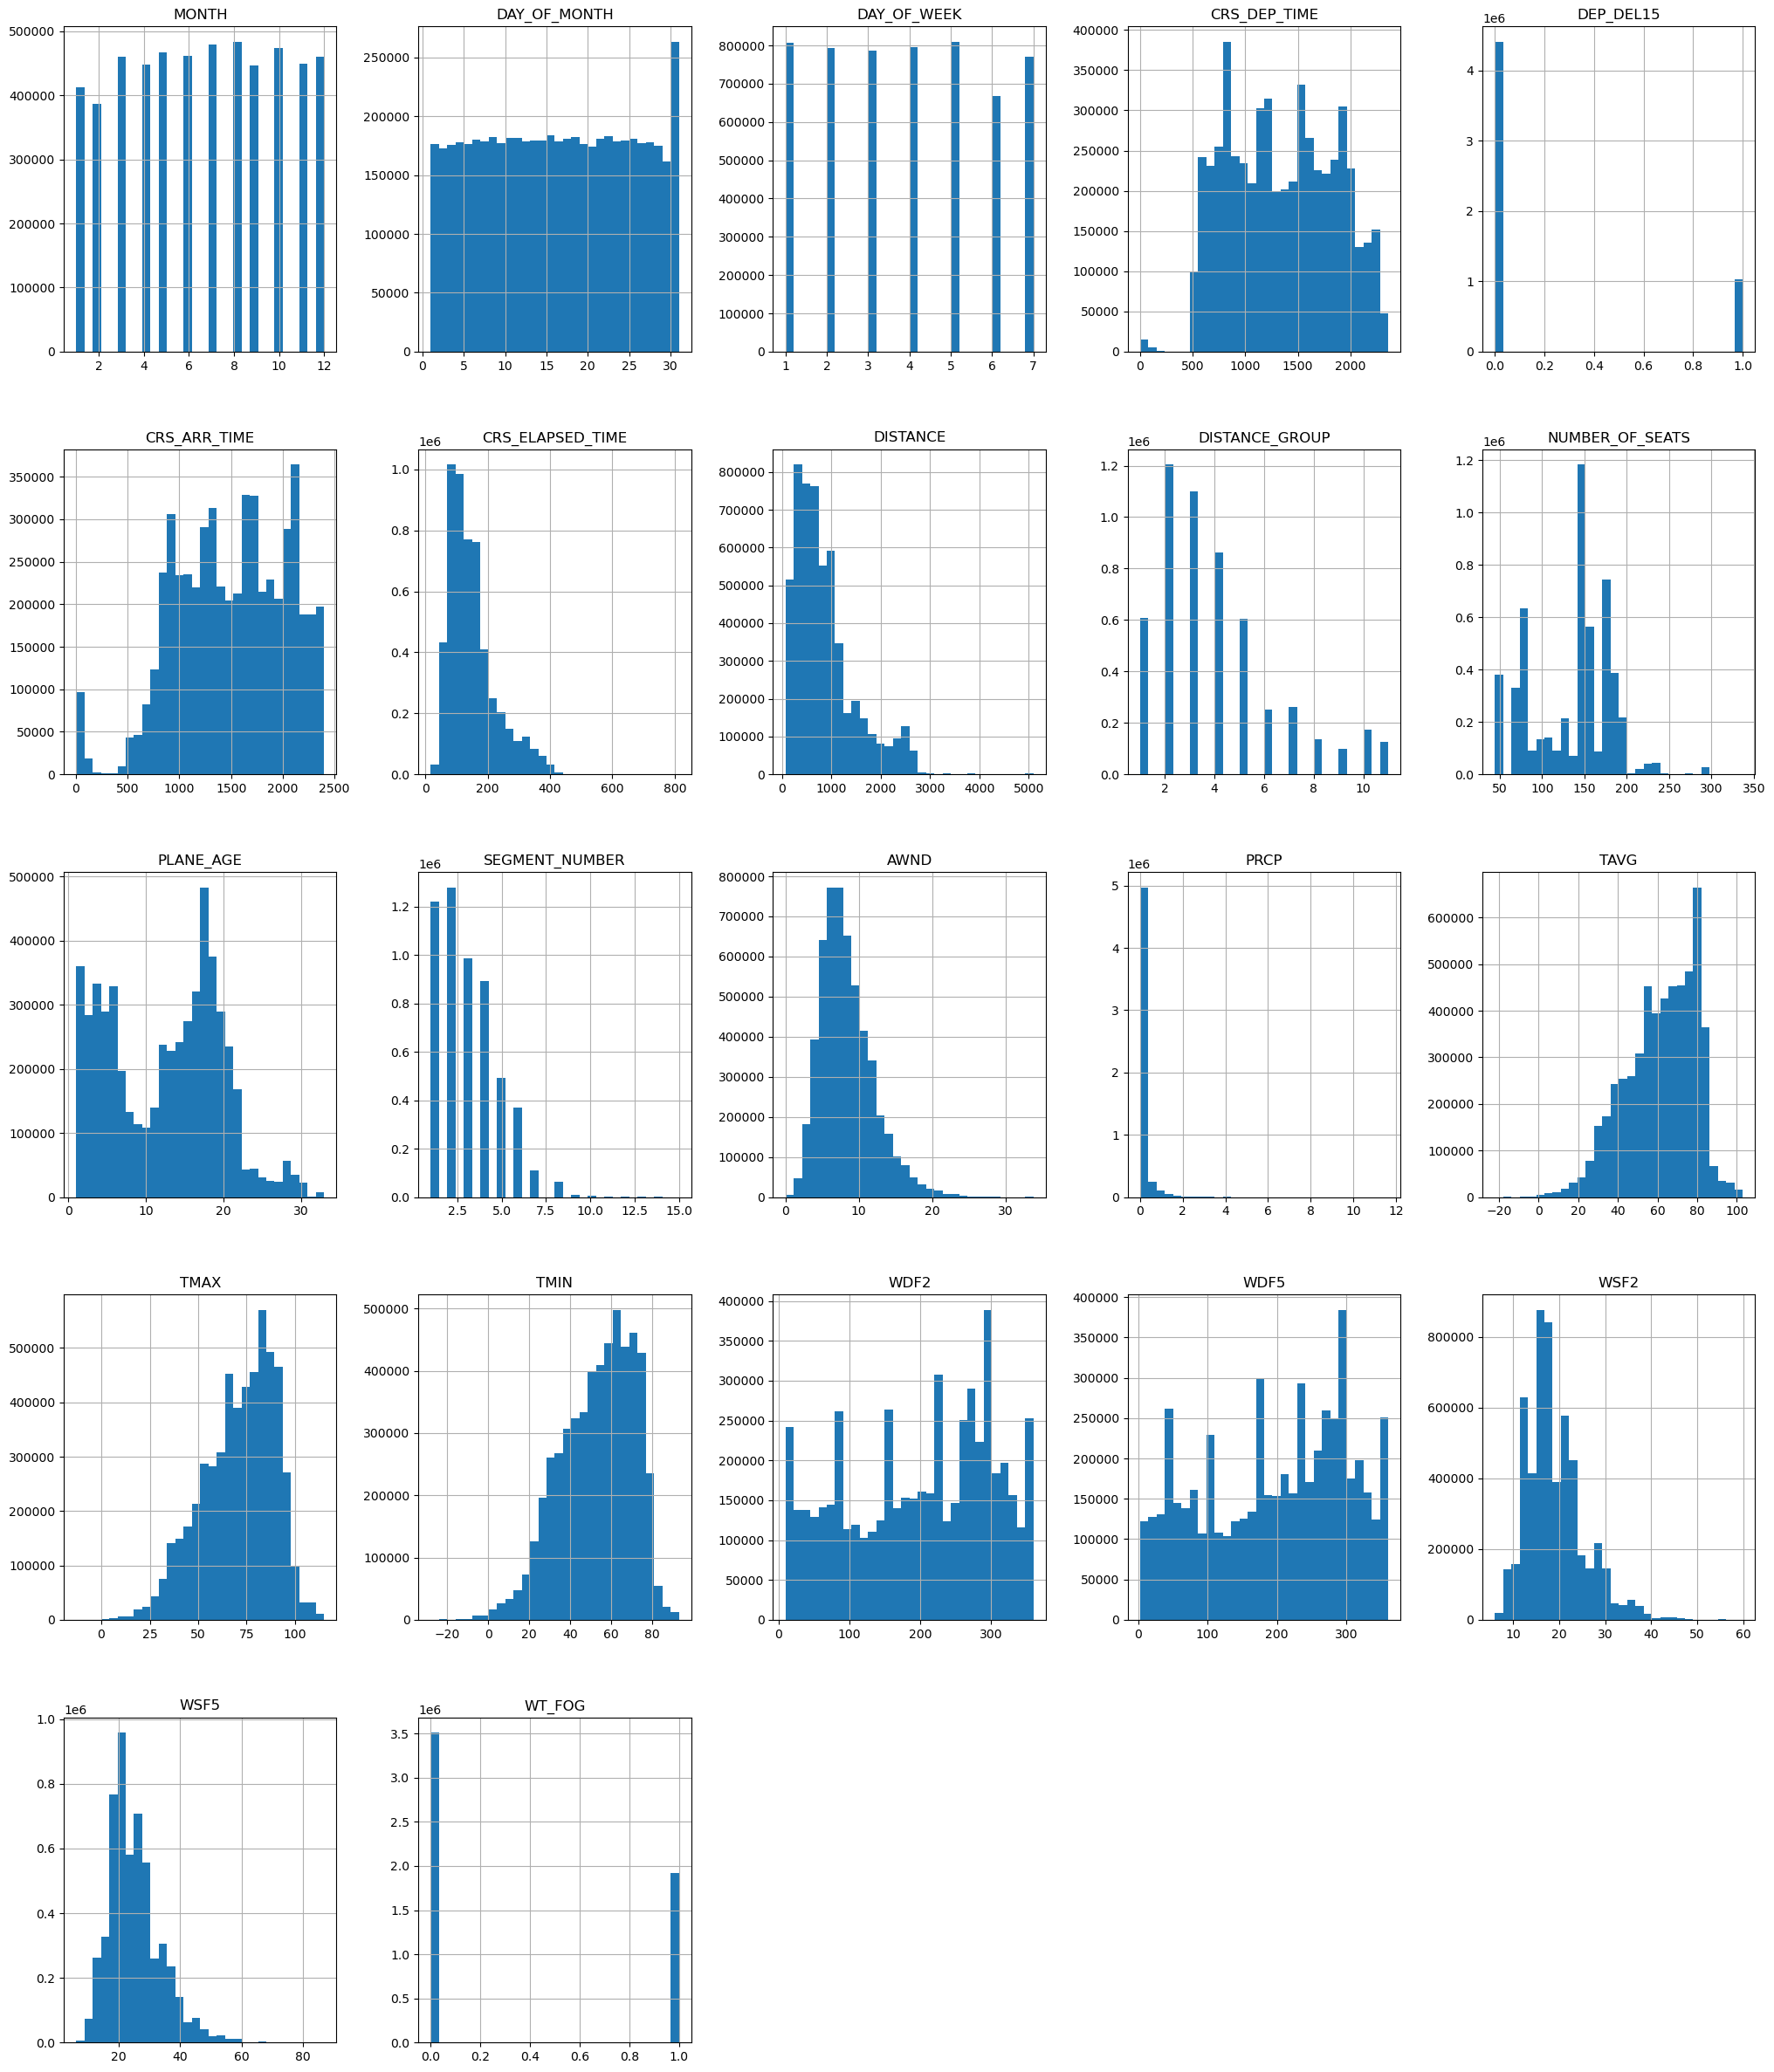

In [26]:
df.hist(bins=30, figsize=(25, 30));

In [31]:
df.to_csv('data/Cleaned.csv',index= False)

## Training

### Decision tree

In [3]:
df = pd.read_csv('data/Cleaned.csv')
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DEL15,CRS_ARR_TIME,CRS_ELAPSED_TIME,...,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT03,WT08,WT_FOG
0,1,28,1,N13718,ORD,PSP,1028,1.0,1306,278.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0.0,1.0,1
1,1,28,1,N56859,ORD,DEN,1011,1.0,1200,169.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0.0,1.0,1
2,1,28,1,N37253,ORD,IAH,600,1.0,853,173.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0.0,1.0,1
3,1,28,1,N57864,ORD,DEN,851,0.0,1040,169.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0.0,1.0,1
4,1,28,1,N68802,ORD,SJU,754,1.0,1435,281.0,...,18.0,34.0,8.0,300.0,290.0,25.9,35.1,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5430337,12,25,3,N485HA,LIH,HNL,1835,0.0,1911,36.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0.0,0.0,0
5430338,12,25,3,N475HA,LIH,HNL,1659,1.0,1736,37.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0.0,0.0,0
5430339,12,25,3,N486HA,LIH,HNL,2025,0.0,2100,35.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0.0,0.0,0
5430340,12,25,3,N492HA,LIH,HNL,2123,0.0,2158,35.0,...,76.0,82.0,73.0,150.0,150.0,36.0,46.1,0.0,0.0,0


In [4]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DEL15', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_NAME', 'NUMBER_OF_SEATS',
       'PLANE_AGE', 'SEGMENT_NUMBER', 'PREVIOUS_AIRPORT', 'AWND', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT03', 'WT08',
       'WT_FOG'],
      dtype='object')

In [6]:
# get weather columns from df
weather_cols = ['AWND', 'PRCP','TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT03', 'WT08','WT_FOG']
# train tree on weather columns with DEP_DEL15 as target
X = df[weather_cols]
y = df['DEP_DEL15']

# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.2)

# train tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=27)
tree.fit(X_train, y_train)

# get predictions
y_pred = tree.predict(X_test)

# get accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

0.8139630170827084

[0.11389518 0.20563082 0.08316639 0.12251941 0.09648922 0.08557967
 0.07806032 0.07698328 0.07712445 0.04119271 0.01070163 0.00865692]
Index(['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5',
       'WT03', 'WT08', 'WT_FOG'],
      dtype='object')


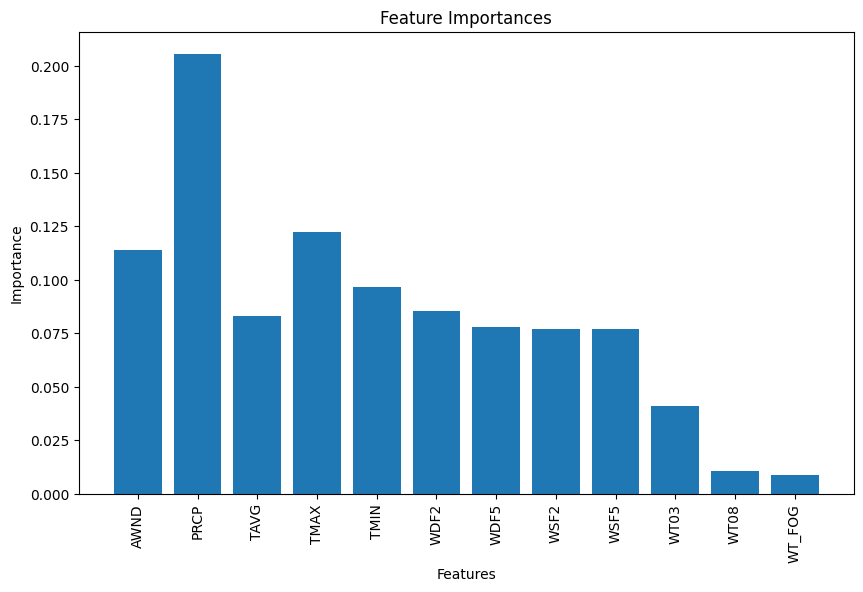

In [7]:
# get feature importances
importances = tree.feature_importances_
print(importances)

# get feature names
feature_names = X.columns
print(feature_names)

# combine feature names and importances into a dataframe
feature_importances = pd.DataFrame({'feature':feature_names, 'importance':importances})
feature_importances

# sort features by importance
feature_importances.sort_values(by='importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

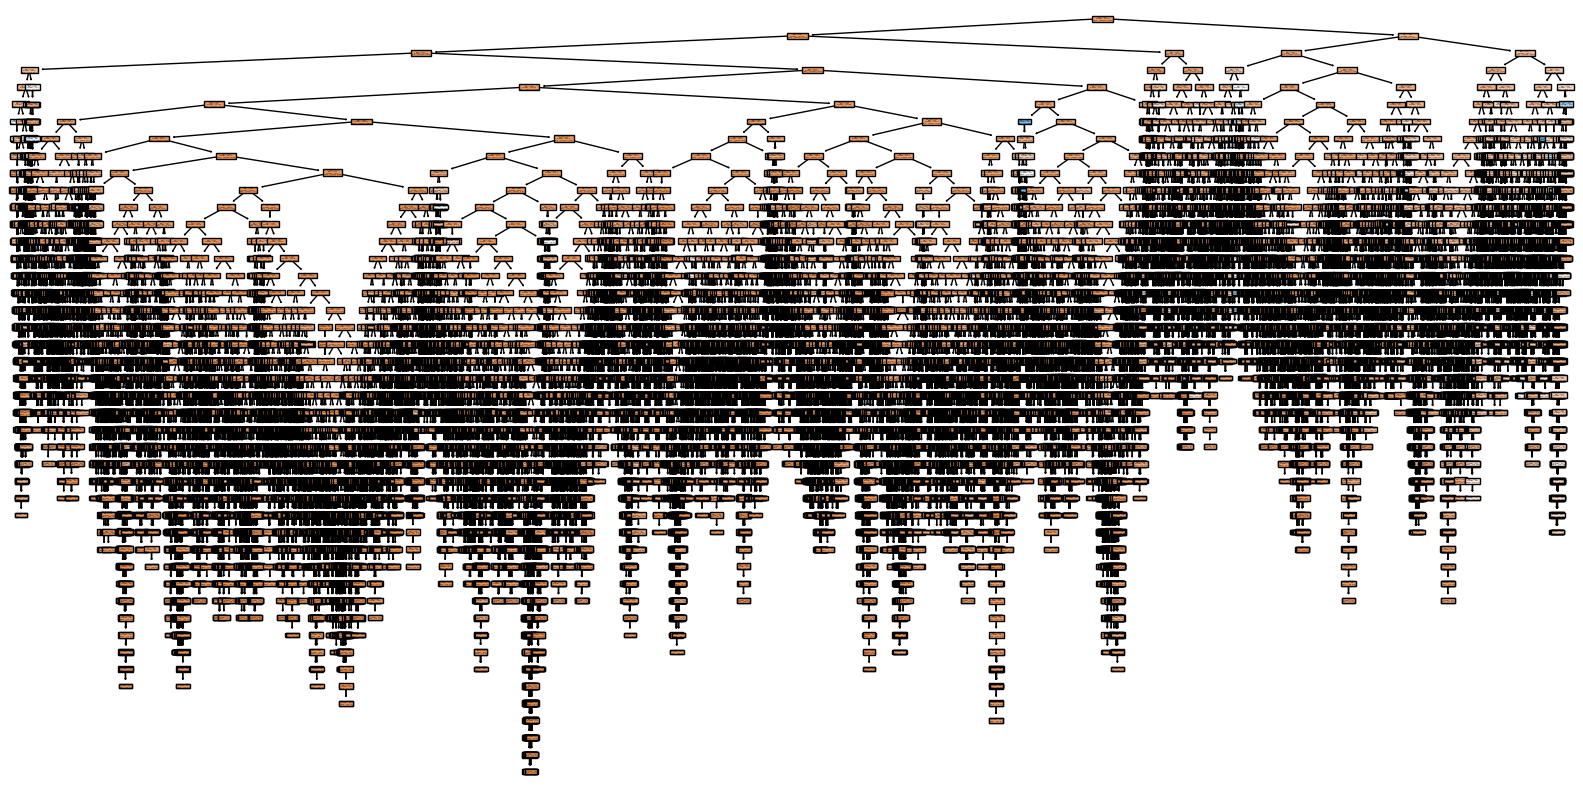

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()

### Random forests and SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming your data is in a DataFrame named 'df'
X = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']]
y = df['DEP_DEL15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Use a classifier, e.g., Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74    880677
         1.0       0.28      0.59      0.38    205392

    accuracy                           0.63   1086069
   macro avg       0.57      0.62      0.56   1086069
weighted avg       0.76      0.63      0.67   1086069



### Gradient boosting

In [10]:
# train XGBoost model on the SMOTE data
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_resampled, y_resampled)

# get predictions
y_pred = xgb.predict(X_test)

# get accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74    880677
         1.0       0.27      0.57      0.37    205392

    accuracy                           0.63   1086069
   macro avg       0.57      0.61      0.55   1086069
weighted avg       0.75      0.63      0.67   1086069



## Evaluation